In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image
import csv
def px_remove(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x+1]+temp[y,x-1])/4
    return temp

def px_remove_edge(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x-1])/3
    return temp

plt.rcParams.update({'font.size':13})
plt.rcParams['font.sans-serif'] = "Helvetica"

<IPython.core.display.Javascript object>


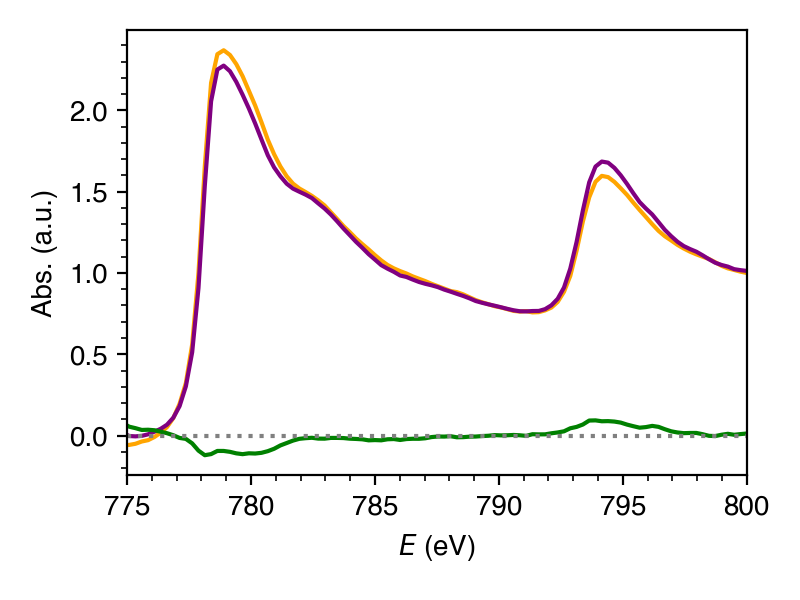

In [4]:
### Energy Spectra ###
%matplotlib notebook
pos=np.loadtxt('Spectra_Data/pos_XMCD.csv',dtype='float',skiprows=1,delimiter=',')
neg=np.loadtxt('Spectra_Data/neg_XMCD.csv',dtype='float',skiprows=1,delimiter=',')

div=np.loadtxt('Spectra_Data/divide_XMCD.csv',dtype='float',skiprows=1,delimiter=',')
sub=np.loadtxt('Spectra_Data/subtract_XMCD.csv',dtype='float',skiprows=1,delimiter=',')


I_pos = pos[:,1]*-1+113*1000
I_neg = neg[:,1]*-1+112*1000
E = np.linspace(770,800,len(I_pos))


I_sub = sub[:,1]
I_div = div[:,1]
E_sub = np.linspace(770,800,len(I_sub))
E_div = np.linspace(770,800,len(I_div))



I_resub = I_neg-I_pos


plt.figure(figsize=(4,3))
ax1=plt.subplot2grid((1,1),(0,0), rowspan=1,colspan=2)
plt.plot(E,I_pos/I_pos[-1],color='orange')
plt.plot(E,I_neg/I_pos[-1],color='purple')

plt.plot(E,I_resub/I_pos[-1],color='green')

plt.plot([775,800],[0,0],color='grey',ls=':')
#plt.plot(E_sub,I_sub,color='r')
#plt.plot(E_div,I_div,color='k')
plt.xlim(775,800)

ax1.minorticks_on()
plt.xlabel('$E$ (eV)')
plt.ylabel('Abs. (a.u.)')

plt.tight_layout()
plt.savefig('Figure_Panels/Extended_Data_Co_Spectrum.png',dpi=300)